In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('../data/fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Display 5–6 rows where the job is marked as fraudulent
df[df['fraudulent'] == 1].sample(6, random_state=42)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17789,17790,customer service rep,"US, CA, sacremento",NaN,NaN,NaN,customer service reps needed asap,NaN,will explain on phone interview,0,0,1,NaN,NaN,NaN,NaN,NaN,1
11628,11629,Sales Professional- SMB (Full-Time),"US, MD, Baltimore",Sales and Research,21600-31200,Making Mobile Device Management Clear is Clear...,- Maintain a high level of Clearmark solution ...,Job Requirements High School Diploma or GEDPas...,401kHealth InsurancePaid Time OffVacation Time...,0,1,0,Full-time,Entry level,High School or equivalent,Computer & Network Security,Sales,1
17617,17618,Office Assistant III,"US, FL, jacksonville",NaN,2000-3000,NaN,"Essential DutiesGreets callers and visitors, d...",Minimum QualificationsA high school graduate o...,All candidates are eligible for benefits inclu...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Telecommunications,Administrative,1
17777,17778,Hiring Part-Time Workers (CASH PAYING),"US, CA, Los Angeles",NaN,NaN,NaN,Hiring Part-Time Workers (CASH PAYING)You can ...,No any experience #URL_5a85681305d45d339fe0299...,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
997,998,EXECUTIVE SOUS CHEF,"MY, ,",NaN,55000-65000,Le Meridien is situated in the heart of kuala ...,Responsible for assisting in the direction and...,NaN,NaN,0,1,0,Contract,Executive,NaN,Hospitality,NaN,1
4772,4773,Urgently Required J2EE Developer for Bahrain,"BH, ,",Information Technology,NaN,NaN,Greetings from VAM SYSTEMS…..VAM SYSTEMS is a ...,Skillset required:2-3 years of J2EE experience...,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,1


In [6]:
# Drop columns that may not help the model or can leak info
df = df.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'], axis=1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   company_profile      14572 non-null  object
 4   description          17879 non-null  object
 5   requirements         15184 non-null  object
 6   benefits             10668 non-null  object
 7   employment_type      14409 non-null  object
 8   required_experience  10830 non-null  object
 9   required_education   9775 non-null   object
 10  industry             12977 non-null  object
 11  function             11425 non-null  object
 12  fraudulent           17880 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 1.8+ MB


In [10]:

# Fill NaNs with empty strings
text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df[text_cols] = df[text_cols].fillna('')

# Merge selected text fields (cuz ultimately we need textual clues)
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']


In [12]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & digits
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [13]:
#encoding the targt coln
df['fraudulent'].value_counts()


fraudulent
0    17014
1      866
Name: count, dtype: int64

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer: keeping the 5k most impt words 
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the cleaned text
X = tfidf.fit_transform(df['clean_text'])

# Labels (target variable)
y = df['fraudulent']


C:\Users\shrey\AppData\Local\Temp\ipykernel_22812\3205427660.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=df, palette='Set2')


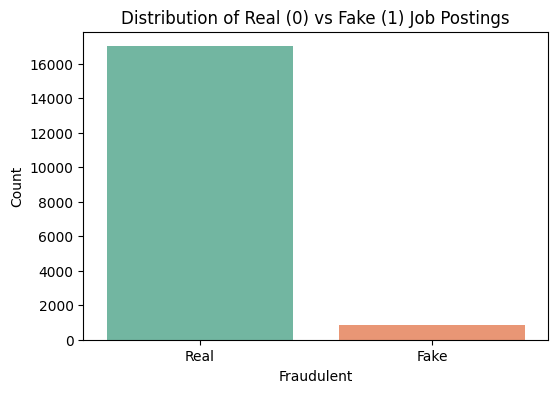

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df, palette='Set2')
plt.title('Distribution of Real (0) vs Fake (1) Job Postings')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_22812\3411036870.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_df, palette='flare')


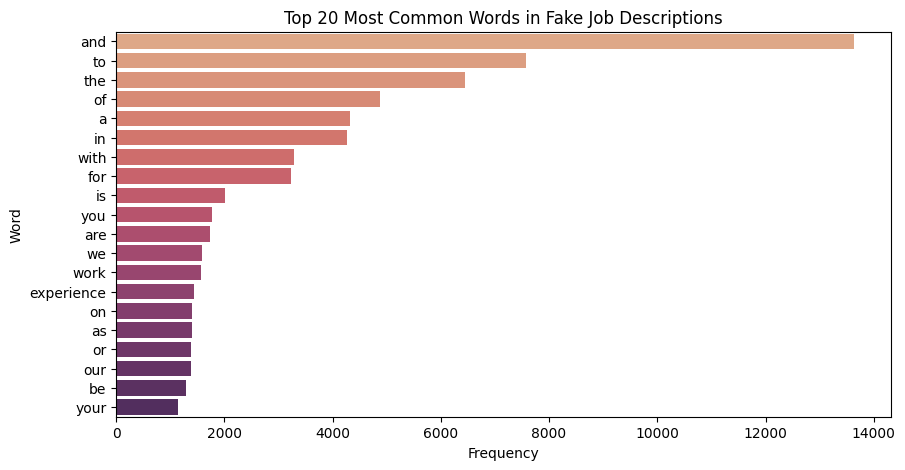

In [16]:
from collections import Counter

# Combine text from fake job posts
fake_jobs_text = ' '.join(df[df['fraudulent'] == 1]['clean_text'])

# Count word frequencies
fake_word_counts = Counter(fake_jobs_text.split())
common_fake_words = fake_word_counts.most_common(20)

# Convert to DataFrame for plotting
common_df = pd.DataFrame(common_fake_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_df, palette='flare')
plt.title('Top 20 Most Common Words in Fake Job Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)


In [18]:
#training the model 
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,         # grow until all leaves are pure
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#model evaluation
print("Training Accuracy:", rf_model.score(X_train, y_train))


Training Accuracy: 0.9999300894854586


Test Accuracy: 0.9793

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.57      0.73       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.86      3576
weighted avg       0.98      0.98      0.98      3576



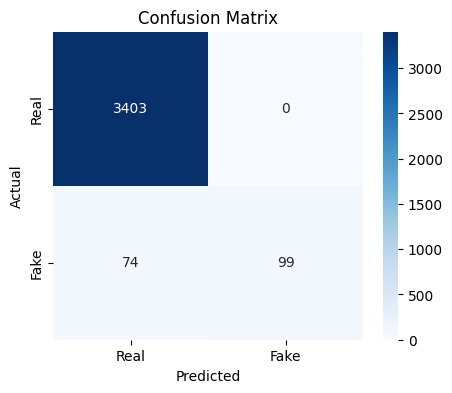

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on test set
y_pred = rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_22812\3270136040.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Word', data=important_df, palette='viridis')


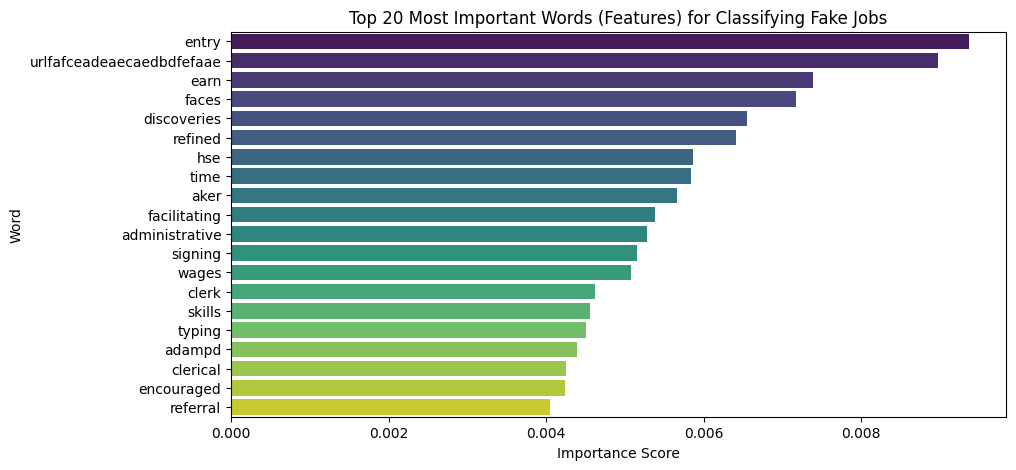

In [24]:
import numpy as np

# Get feature importances from the model
importances = rf_model.feature_importances_

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Combine them and sort
indices = np.argsort(importances)[::-1][:20]
top_features = [(feature_names[i], importances[i]) for i in indices]

# Convert to DataFrame
important_df = pd.DataFrame(top_features, columns=['Word', 'Importance'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Word', data=important_df, palette='viridis')
plt.title('Top 20 Most Important Words (Features) for Classifying Fake Jobs')
plt.xlabel('Importance Score')
plt.ylabel('Word')
plt.show()


In [27]:
import os

# Make the models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)


In [28]:
import joblib

joblib.dump(rf_model, '../models/rf_model.joblib')
joblib.dump(tfidf, '../models/tfidf_vectorizer.joblib')


['../models/tfidf_vectorizer.joblib']

In [29]:
def predict_job_fraud(title, company_profile, description, requirements, benefits):
    import joblib

    # Load model and vectorizer
    model = joblib.load('../models/rf_model.joblib')
    vectorizer = joblib.load('../models/tfidf_vectorizer.joblib')

    # Combine and clean input
    import re
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    # Merge input fields
    combined = f"{title} {company_profile} {description} {requirements} {benefits}"
    cleaned = clean_text(combined)

    # Vectorize and predict
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)[0]

    return "Fake Job Posting" if prediction == 1 else "Real Job Posting"


In [30]:
predict_job_fraud(
    title="Online Work From Home Opportunity",
    company_profile="Earn money quickly with flexible hours",
    description="We offer daily payouts for typing work. No experience required.",
    requirements="Basic computer knowledge, internet",
    benefits="Daily payment, flexible schedule"
)


'Fake Job Posting'

In [32]:
#streamlit app
!pip install streamlit

   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.1 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/10.1 MB 880.1 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/10.1 MB 880.1 kB/s eta 0:00:11
   ---- ----------------------------------- 1.0/10.1 MB 923.9 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/10.1 MB 939.4 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/10.1 MB 953.6 kB/s eta 0:00:09
   ------- -------------------------------- 1.8/10.1 MB 974.2 kB/s eta 0:00:09
   -------- ------------------------------- 2.1/10.1 MB 991.8 kB/s eta 0:00:09
   -------- ------------------------------- 2.1/10.1 MB 991.8 kB/s eta 0:00:09
   --------- ------------------------------ 2.4/10.1 MB 994.7 kB/s eta 0:00:08
  

In [33]:
import streamlit as st
import joblib
import re

# Load the trained model and vectorizer
model = joblib.load('../models/rf_model.joblib')
vectorizer = joblib.load('../models/tfidf_vectorizer.joblib')

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Streamlit UI
st.set_page_config(page_title="Fake Job Detection", layout="centered")

st.title("🕵️ Fake Job Posting Prediction App")
st.write("Fill in the job details to check if it's likely **real or fake**.")

# Input fields
title = st.text_input("Job Title")
company_profile = st.text_area("Company Profile")
description = st.text_area("Job Description")
requirements = st.text_area("Job Requirements")
benefits = st.text_area("Job Benefits")

# When user clicks "Predict"
if st.button("Predict"):
    combined_text = f"{title} {company_profile} {description} {requirements} {benefits}"
    cleaned_text = clean_text(combined_text)
    vector = vectorizer.transform([cleaned_text])
    prediction = model.predict(vector)[0]

    if prediction == 1:
        st.error("🚨 This job posting is likely **FAKE**.")
    else:
        st.success("✅ This job posting is likely **REAL**.")


2025-06-21 15:23:36.810 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 15:23:36.811 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 15:23:37.161 
  command:

    streamlit run C:\Users\shrey\miniconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-21 15:23:37.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 15:23:37.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 15:23:37.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 15:23:37.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when run